In [28]:
import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('datasets/AB_NYC_2019.csv')

#### Link to dataset: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

### Goal:
#### To out where in New York City is the best place to rent an Airbnb and what type of room to get

In [2]:
df.dropna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### How many Airbnbs are there in each major neighbourhood group?

In [5]:
print("Number of Airbnbs in each neighborhood")
print(df['neighbourhood_group'].value_counts())

Number of Airbnbs in each neighborhood
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


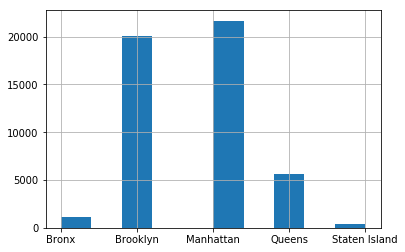

In [6]:
df['neighbourhood_group'].hist()
plt.show()

In [7]:
print("Percentage of Airbnbs in each neighbourhood in comparison to all of New York")
print(round(df['neighbourhood_group'].value_counts(normalize=True)*100, 3))

Percentage of Airbnbs in each neighbourhood in comparison to all of New York
Manhattan        44.301
Brooklyn         41.117
Queens           11.588
Bronx             2.231
Staten Island     0.763
Name: neighbourhood_group, dtype: float64


#### As shown here, Manhattan and Brooklyn are by far the most popular neighbourhood groups to host an Airbnb in NYC

### What neighborhood groups have the highest average Airbnb price?

In [8]:
for area in df['neighbourhood_group'].unique():
    print(area + " " + str(df[df['neighbourhood_group'] == area]['price'].mean()) +" STD DEV: " + str(df[df['neighbourhood_group'] == area]['price'].std()))

Brooklyn 124.38320732192598 STD DEV: 186.87353781366113
Manhattan 196.8758136743456 STD DEV: 291.38318274158297
Queens 99.51764913519237 STD DEV: 167.10215506344343
Staten Island 114.81233243967829 STD DEV: 277.62040332462215
Bronx 87.4967919340055 STD DEV: 106.70934861314652


Neighbourhood: Brooklyn


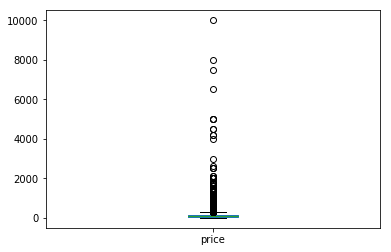

Neighbourhood: Manhattan


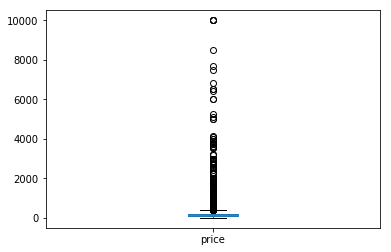

Neighbourhood: Queens


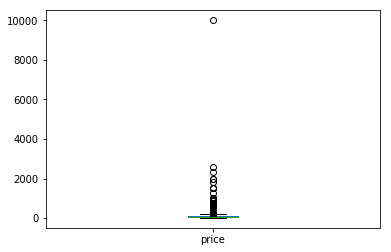

Neighbourhood: Staten Island


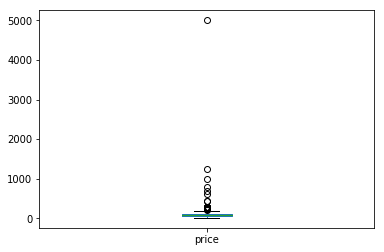

Neighbourhood: Bronx


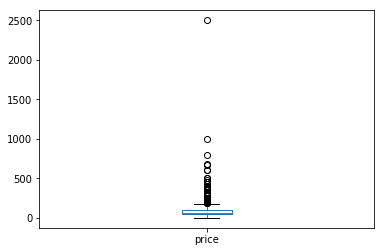

In [9]:
for area in df['neighbourhood_group'].unique():
    print("Neighbourhood: " + area)
    df[df['neighbourhood_group'] == area]['price'].plot.box()
    plt.show()

In [63]:
old_df = df
df = df[df['price'].between(df['price'].quantile(.15), df['price'].quantile(.85))] # without outliers
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
23,8110,CBG Helps Haiti Rm #2,22486,Lisel,Brooklyn,Park Slope,40.68001,-73.97865,Private room,110,2,71,2019-07-02,0.61,6,304
24,8490,"MAISON DES SIRENES1,bohemian apartment",25183,Nathalie,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,Entire home/apt,120,2,88,2019-06-19,0.73,2,233
41,12299,Beautiful Sunny Park Slope Brooklyn,47610,Abdul,Brooklyn,South Slope,40.66278,-73.97966,Entire home/apt,120,3,15,2019-05-27,0.39,1,345
42,12303,1bdr w private bath. in lofty apt,47618,Yolande,Brooklyn,Fort Greene,40.69673,-73.97584,Private room,120,7,25,2018-09-30,0.23,1,311
47,12940,Charming Brownstone 3 - Near PRATT,50148,Adreinne,Brooklyn,Bedford-Stuyvesant,40.68111,-73.95591,Entire home/apt,110,7,61,2019-05-25,0.52,1,265
48,13050,bright and stylish duplex,50846,Jennifer,Brooklyn,Bedford-Stuyvesant,40.68554,-73.94090,Entire home/apt,115,3,11,2017-01-01,0.10,1,0
56,14991,"Great Location, Manhattan Bedroom!",59023,Bianca,Manhattan,Lower East Side,40.72004,-73.99104,Private room,110,5,19,2019-05-18,0.17,1,301
74,17747,BLUE TRIM GUEST HOUSE,68599,George,Brooklyn,Clinton Hill,40.68346,-73.96374,Private room,105,2,105,2019-06-26,0.92,1,304
81,19159,Spacious luminous apt Upper West NYC,73051,Sybilla,Manhattan,Harlem,40.82915,-73.95136,Entire home/apt,110,31,54,2019-03-23,0.49,1,209


Neighbourhood: Manhattan


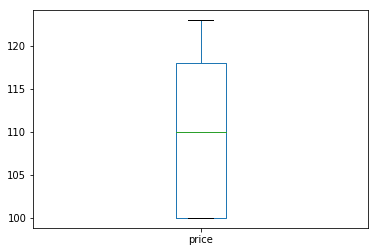

Neighbourhood: Brooklyn


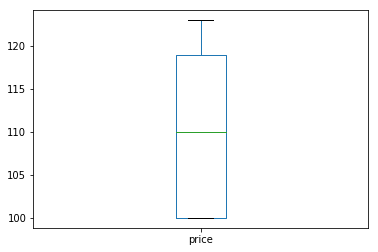

Neighbourhood: Bronx


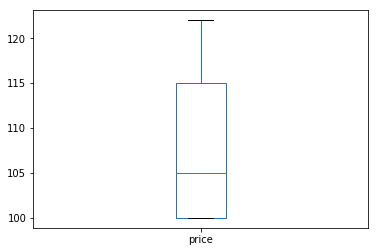

Neighbourhood: Queens


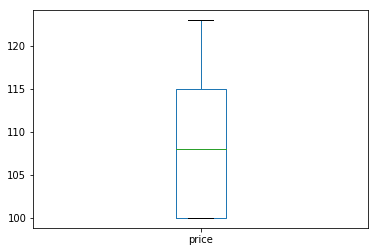

Neighbourhood: Staten Island


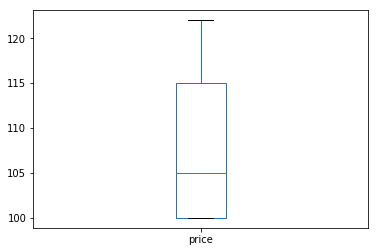

In [67]:
for area in df['neighbourhood_group'].unique():
    print("Neighbourhood: " + area)
    df[df['neighbourhood_group'] == area]['price'].plot.box()
    plt.show()

#### On average, Manhattan and Brooklyn have the highest price per night as well as the most Airbnbs

#### Along with having the two highest average prices, Manhattan and Brooklyn are also by far the most popular locations to host an Airbnb

### Since Manhattan is so popular, let's look more into the smaller neighborhoods it contains

In [47]:
Manh_neigh_price = list()
for area in df[df['neighbourhood_group'] == 'Manhattan']['neighbourhood'].unique():
    print(area + ": " + str(round(df[df['neighbourhood_group'] == 'Manhattan'][df['neighbourhood'] == area]['price'].mean(),2)))
    Manh_neigh_price.append((area, round(df[df['neighbourhood_group'] == 'Manhattan'][df['neighbourhood'] == area]['price'].mean(),2)))

West Village: 114.77
Lower East Side: 110.95
East Village: 111.36
Harlem: 110.04
Chelsea: 110.83
Hell's Kitchen: 111.73
Upper East Side: 112.87
Morningside Heights: 111.63
East Harlem: 109.3
NoHo: 112.2
Roosevelt Island: 107.27
Chinatown: 111.55
Midtown: 111.31
Upper West Side: 111.06
Two Bridges: 109.54
Kips Bay: 112.25
Murray Hill: 115.89
Washington Heights: 109.61
Financial District: 112.65
Greenwich Village: 112.56
Inwood: 107.22
Gramercy: 113.12
Nolita: 110.49
SoHo: 111.02
Tribeca: 107.21
Civic Center: 103.64
Theater District: 104.49
Battery Park City: 106.79
Flatiron District: 108.17
Little Italy: 111.37
Stuyvesant Town: 114.88
Marble Hill: 110.0


In [48]:
Manh_neigh_price.sort(key = lambda x: x[1], reverse = True)
Manh_neigh_price[:5]

[('Murray Hill', 115.89),
 ('Stuyvesant Town', 114.88),
 ('West Village', 114.77),
 ('Gramercy', 113.12),
 ('Upper East Side', 112.87)]

#### Five most expensive areas in New York for Airbnbs

In [49]:
NY_neigh_price = list()
for area in df['neighbourhood'].unique():
    print(area + ": " + str(round(df[df['neighbourhood'] == area]['price'].mean(),2)))
    NY_neigh_price.append((area, round(df[df['neighbourhood'] == area]['price'].mean(),2)))

West Village: 114.77
Crown Heights: 108.93
Park Slope: 112.22
Bedford-Stuyvesant: 110.86
South Slope: 111.47
Fort Greene: 113.29
Long Island City: 110.22
Lower East Side: 110.95
East Village: 111.36
Clinton Hill: 111.34
Harlem: 110.04
Flatbush: 108.52
Williamsburg: 109.69
Bushwick: 109.4
Chelsea: 110.83
Hell's Kitchen: 111.73
Prospect Heights: 113.08
Upper East Side: 112.87
Morningside Heights: 111.63
Middle Village: 106.91
East Harlem: 109.3
NoHo: 112.2
Roosevelt Island: 107.27
Chinatown: 111.55
Midtown: 111.31
Astoria: 109.44
Eastchester: 110.0
Upper West Side: 111.06
Greenpoint: 113.11
Brooklyn Heights: 114.31
Two Bridges: 109.54
Kips Bay: 112.25
Gowanus: 114.49
Forest Hills: 107.53
Murray Hill: 115.89
Boerum Hill: 115.23
Gravesend: 110.2
Allerton: 110.8
Fort Hamilton: 113.31
Bensonhurst: 112.05
Washington Heights: 109.61
Sunset Park: 108.93
Cobble Hill: 113.73
Arrochar: 113.0
Financial District: 112.65
East New York: 109.34
East Flatbush: 108.67
Greenwich Village: 112.56
Inwood: 10

In [50]:
NY_neigh_price.sort(key = lambda x: x[1], reverse = True)
NY_neigh_price[:5]

[('Mariners Harbor', 130.0),
 ('Morris Heights', 130.0),
 ('Navy Yard', 125.0),
 ('Norwood', 125.0),
 ('Olinville', 125.0)]

#### Before outliers are removed, Tribeca is the only neighourhood in Manhattan that is also in the top five most expensive Airbnbs in NYC. however none of the Manhattans neightborhoods were in the most expensive after removing outliers

### Now lets compare different types of room offerings

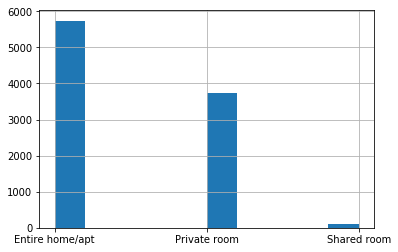

In [51]:
df['room_type'].hist()
plt.show()

In [52]:
for room_type in df['room_type'].unique():
    print(str(room_type) + " : " + str(round(df[df['room_type'] == room_type]['price'].mean(), 2)))

Entire home/apt : 112.75
Private room : 107.55
Shared room : 107.03


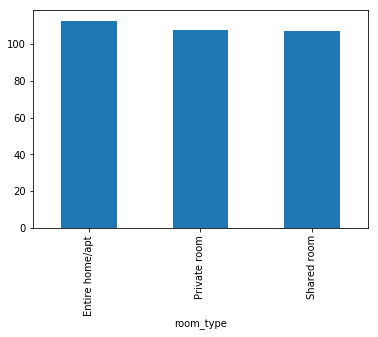

In [53]:
df.groupby('room_type')['price'].mean().plot(kind='bar')
plt.show()

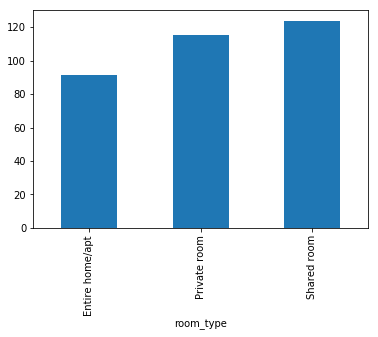

In [54]:
df.groupby('room_type')['availability_365'].mean().plot(kind='bar')
plt.show()

#### From here you can see even though shared rooms are the cheapest with the most availability, other housing options are much more popular

### Which neighborhoods have the highest number of reviews per month?

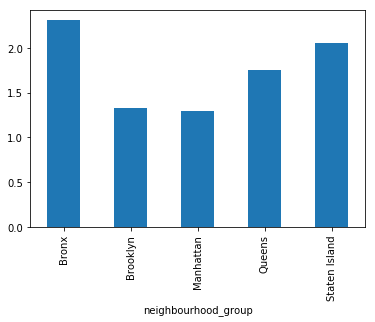

In [55]:
df.groupby('neighbourhood_group')['reviews_per_month'].mean().plot(kind='bar')
plt.show()

#### Is there a correlation between price and number of reviews per month?

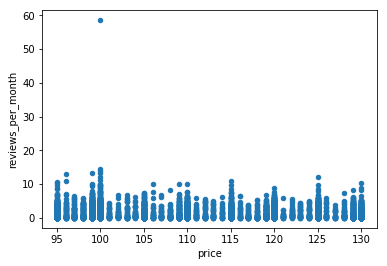

In [56]:
df.plot.scatter(x='price', y='reviews_per_month')
plt.show()

In [57]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.558945,-0.010154,0.091848,-0.022573,-0.044170,-0.320874,0.265794,0.059908,0.029297
host_id,0.558945,1.000000,0.025463,0.100563,-0.026514,-0.034691,-0.130925,0.283307,0.113595,0.186013
latitude,-0.010154,0.025463,1.000000,0.109417,-0.010807,0.026473,-0.022242,-0.017836,0.012641,-0.026946
longitude,0.091848,0.100563,0.109417,1.000000,-0.060758,-0.050174,0.033915,0.120831,-0.079976,0.108447
price,-0.022573,-0.026514,-0.010807,-0.060758,1.000000,0.021369,-0.011382,-0.044635,0.040925,0.011734
minimum_nights,-0.044170,-0.034691,0.026473,-0.050174,0.021369,1.000000,-0.056451,-0.110840,0.096516,0.133013
number_of_reviews,-0.320874,-0.130925,-0.022242,0.033915,-0.011382,-0.056451,1.000000,0.548388,-0.050704,0.216520
reviews_per_month,0.265794,0.283307,-0.017836,0.120831,-0.044635,-0.110840,0.548388,1.000000,-0.056028,0.198984
calculated_host_listings_count,0.059908,0.113595,0.012641,-0.079976,0.040925,0.096516,-0.050704,-0.056028,1.000000,0.196405
availability_365,0.029297,0.186013,-0.026946,0.108447,0.011734,0.133013,0.216520,0.198984,0.196405,1.000000


#### From here, you can see price and number of reviews per month have nearly no correlation(-0.044635)

#### And from this matrix of correlations shows that price does not correlate with anything else in the dataset. It could correlate with things like reviews, but those are not provided.

### How does the number of listings each host has correspond to the neighourhood

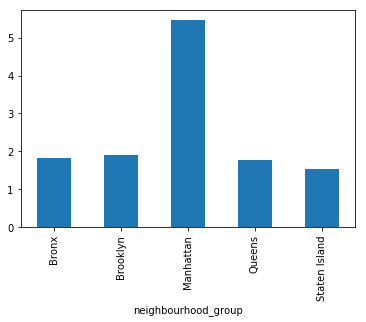

In [58]:
df.groupby('neighbourhood_group')['calculated_host_listings_count'].mean().plot(kind='bar')
plt.show()

### What is the largest amount of rentals that a single host has?

In [66]:
host_listings = list()
for host_id in df['host_id'].unique():
    host_listings.append((str(host_id), len(df[df['host_id'] == host_id])))
host_listings.sort(key = lambda x: x[1], reverse = True)
host_listings[:5]

[('13347167', 21),
 ('1475015', 16),
 ('213781715', 16),
 ('219517861', 14),
 ('260639745', 13)]

## Data shortcomings

#### Data set did not include ratings of individual rentals or hosts, only number of ratings.

#### No seasonal data provided, so could not see when the best time to visit NYC is

### References:
https://nextjournal.com/schmudde/how-to-remove-outliers-in-data